In [1]:
#!pip install nltk

## Text Preprocessing

Text preprocessing is an essential step in natural language processing (NLP) tasks. It involves transforming raw text data into a format that is more suitable for analysis and machine learning algorithms. In this tutorial, we will cover various common techniques for text preprocessing. Let's dive in!


### Lowercasing
Converting all text to lowercase can help to normalize the data and reduce the vocabulary size. It ensures that words in different cases are treated as the same word. For example, "apple" and "Apple" will both be transformed to "apple".

In [2]:
sent = "Cunningham's system was inspired by his having used Apple's hypertext software HyperCard, which allowed users to create interlinked 'stacks' of virtual cards."

In [3]:
sent

"Cunningham's system was inspired by his having used Apple's hypertext software HyperCard, which allowed users to create interlinked 'stacks' of virtual cards."

In [4]:
lower_sent = sent.lower()
lower_sent

"cunningham's system was inspired by his having used apple's hypertext software hypercard, which allowed users to create interlinked 'stacks' of virtual cards."

### Removal of Punctuation and Special Characters
Punctuation marks and special characters often do not add much meaning to the text and can be safely removed. Common punctuation marks include periods, commas, question marks, and exclamation marks. You can use regular expressions or string operations to remove them.

In [5]:
common_punctuation = ['.', ',', ':', ';', '!', '?', '(', ')', '"', "'"]

In [6]:
result = ""
for each in lower_sent:
    if each not in common_punctuation:
        result += each

In [7]:
import re

cleaned = re.sub(r'[^\w\s]','', lower_sent)
cleaned

'cunninghams system was inspired by his having used apples hypertext software hypercard which allowed users to create interlinked stacks of virtual cards'

### Stop Word Removal:
Stop words are commonly occurring words in a language, such as "a," "an," "the," "is," and "in." These words provide little semantic value and can be removed to reduce noise in the data. Libraries like NLTK provide a list of predefined stop words for different languages.

Before using the code make sure you downloaded all the stopwords uning the first shell below.

In [8]:
# import nltk
# nltk.download('stopwords')

In [9]:
from nltk.corpus import stopwords

In [10]:
stopwords_eng = stopwords.words('english')

In [11]:
filtered = [word for word in cleaned.split() if word not in stopwords_eng]
filtered = " ".join(filtered)
filtered

'cunninghams system inspired used apples hypertext software hypercard allowed users create interlinked stacks virtual cards'

## Tokenization

Tokenization is the process of breaking down a piece of text into smaller units called tokens. These tokens can be words, subwords, or even characters, depending on the level of granularity desired. Tokenization is a fundamental step in text preprocessing and is crucial for various natural language processing (NLP) tasks, such as machine translation, sentiment analysis, and language generation.


### Word Tokenization
Word tokenization is the most common form of tokenization, where the text is split into individual words. For example, given the sentence "Tokenization is important for NLP tasks," the word tokens would be: ["Tokenization", "is", "important", "for", "NLP", "tasks"].

Word tokenization is typically performed using whitespace as the delimiter. However, it's important to handle cases like punctuation marks, contractions, and hyphenated words correctly. For example, "don't" should be tokenized as ["do", "n't"] instead of ["don", "'", "t"].

Libraries like NLTK, spaCy, and the tokenizers package provide ready-to-use word tokenization functions.

***
Before running any of these tokenization techniques, make sure you have `punkt` downloaded. `punkt` refers to the Punkt Tokenizer, which is a pre-trained unsupervised machine learning model for sentence tokenization. The NLTK Punkt Tokenizer is trained on large corpora and is capable of handling a wide range of sentence boundary detection for multiple languages. It uses a combination of rule-based heuristics and statistical models to identify sentence boundaries accurately.

In [12]:
import nltk
# nltk.download('punkt')
# nltk.download('punkt_tab')

In [13]:
tokens = nltk.word_tokenize(filtered)
print(tokens)

['cunninghams', 'system', 'inspired', 'used', 'apples', 'hypertext', 'software', 'hypercard', 'allowed', 'users', 'create', 'interlinked', 'stacks', 'virtual', 'cards']


## Stemming and Lemmatization

Stemming and lemmatization are techniques used in natural language processing (NLP) to reduce words to their base or root forms. Both approaches aim to normalize words and reduce inflectional variations, enabling better analysis and comparison of words. However, they differ in their methods and outputs. Let's dive into each technique in detail:

### Stemming
Stemming is a process of reducing words to their base or root forms by removing prefixes or suffixes. The resulting form is often a stem, which may not be an actual word itself. The primary goal of stemming is to simplify the vocabulary and group together words with the same base meaning.

For example, when using a stemming algorithm on the words "running," "runs," and "ran," the common stem would be "run." The stemming process cuts off the suffixes ("-ning," "-s," and "-"), leaving behind the core form of the word.

Stemming algorithms follow simple rules and heuristics based on linguistic patterns, rather than considering the context or part of speech of the word. Some popular stemming algorithms include the Porter stemming algorithm, the Snowball stemmer (which supports multiple languages), and the Lancaster stemming algorithm.

Stemming is a computationally lightweight approach and can be useful in certain cases where the exact word form is not crucial. However, it may produce stems that are not actual words, leading to potential loss of meaning and ambiguity.

In [14]:
from nltk.stem import PorterStemmer, LancasterStemmer

In [15]:
stemmer = LancasterStemmer()
stemmer.stem('eating')

'eat'

### Lemmatization
Lemmatization, on the other hand, aims to reduce words to their canonical or dictionary forms, known as lemmas. Unlike stemming, lemmatization considers the context and part of speech (POS) of the word to generate meaningful lemmas. The resulting lemmas are actual words found in the language's dictionary.

For example, when lemmatizing the words "running," "runs," and "ran," the lemma for each would be "run." Lemmatization takes into account the POS information to accurately determine the base form of the word.

Lemmatization algorithms use linguistic rules and morphological analysis to identify the appropriate lemma. They often rely on language-specific resources, such as word lists and morphological databases. Some popular lemmatization tools include the WordNet lemmatizer and the spaCy library (which supports lemmatization for multiple languages).

Lemmatization typically produces more accurate and meaningful results compared to stemming because it retains the core meaning of words. It is especially useful in tasks that require precise word analysis, such as information retrieval, question answering, and sentiment analysis.

However, lemmatization can be more computationally intensive compared to stemming due to its reliance on POS tagging and language-specific resources.

Before running any of these tokenization techniques, make sure you have `wordnet` downloaded.

In [16]:
# import nltk
# nltk.download('wordnet')

In [17]:
from nltk.stem import WordNetLemmatizer

In [18]:
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('tasty')

'tasty'

In [19]:
final = [lemmatizer.lemmatize(each) for each in tokens]
print(final)

['cunningham', 'system', 'inspired', 'used', 'apple', 'hypertext', 'software', 'hypercard', 'allowed', 'user', 'create', 'interlinked', 'stack', 'virtual', 'card']


When deciding between stemming and lemmatization, consider the trade-off between simplicity and accuracy. If you require speed and a broad reduction of word forms, stemming may be sufficient. However, if you need more accurate analysis and want to preserve the semantic meaning of words, lemmatization is generally the preferred choice.

It's important to note that both stemming and lemmatization have limitations. They may not always produce the correct base forms, especially for irregular words or those not present in the chosen language's dictionary. Contextual information, such as word sense disambiguation, can further enhance the accuracy of both techniques.

## Word Embeddings

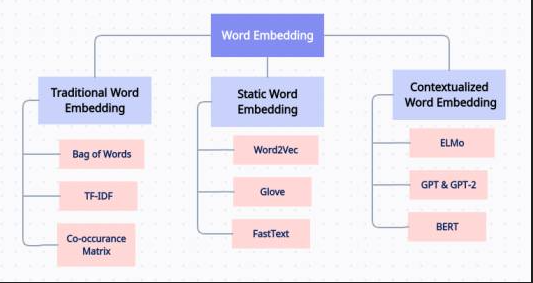

### Bag of words (BoW)

**Bag of Words** model is the simplest and most popular form of word embedding. The key idea of **BoW** models is to encode every word in the vocabulary as one-hot-encoded vector.

If r1, r2 and r3 be three records, the vectors corresponding to r1, r2 and r3 be v1, v2 and v3 respectively such that r1 and r2 are more similar to each other as compared to r3. Then, as general understanding, the vector distance between v1 and v2 is less than that between v1 and v3 or v2 and v3.

<p align="center"><b>
    distance (v1, v2) < distance (v1, v3)<br/>
    similarity (r1, r2) > similarity (r1, r3)
</b></p>

For easy understanding, let us consider a sweet example. Let there be three reviews for a product in ecommerce site as:

    r1: This product is good and is affordable.
    r2: This product is not good and affordable.
    r3: This product is good and cheap.

Let's see how BoW encodes the text data to machine compatible form. Follow along with the below points:

**I. Construct a set of all the unique words present in the corpus:**

    { this, product, is, good, and, affordable, not, cheap }

There are a total of 8 uique words in the set formed. So the size of the vector generated for each review will be 8 as well, with the index position starting from 0 and ending to 7 i.e. 

    { 0: this, 1: product, 2: is, 3: good, 4: and, 5: affordable, 6: not, 7: cheap }

**II. Construct a d-dimensional vector for each review separately:**

Construct a d-dimensional vector (*d* being the vocabulary size) for each review. Each index/dimension of the vector corresponds to a unique word in the vocabulary. The value in each cell of the vector represents the number of times the word with that index occurs in the corpus.

 d | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
---|---|---|---|---|---|---|---|---|
**v1**| 1 | 1 | 2 | 1 | 1 | 1 | 0 | 0 |
**v2**| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 0 |
**v3**| 1 | 1 | 1 | 1 | 1 | 0 | 0 | 1 |

<p style="text-align:center;"><i><b>Table :</b> 8 dimensional vector representation of each review</i></p>

#### Objective

Similar texts (reviews, in this case) must result closer vector.

    distance(v1-v2) = √((1-1)²+(1-1)²+(2-1)²+(1-1)²+(1-1)²+(1-1)²+(0-1)²+(0-0)²) = √2
    distance(v1-v3) = √((1-1)²+(1-1)²+(2-1)²+(1-1)²+(1-1)²+(1-0)²+(0-0)²+(0-1)²) = √3 

The Euclidean distance between vectors v1 and v2 is less than that between v1 and v3. However the meaning of review r1 is completely opposite to that of review r2. Thus, BoW does not preserve the semantic meaning of a words and fails to work when there is small change in the text statements.

#### Limitations

- Vector length is insanely large for large corpus.
- BoW results to sparse matrix, which is what we would like to avoid.
- Retains no information about grammar and ordering of words in a corpus.


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "This product is good and is affordable.",
    "This product is not good and affordable.",
    "This product is good and cheap."
]
vectorizer = CountVectorizer()
output = vectorizer.fit_transform(corpus)

In [21]:
output.toarray()

array([[1, 1, 0, 1, 2, 0, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 0, 1, 1]])

### TF-IDF

In NLP an independent text entity is known as document and the collection of all these documents over the project space is known as corpus. *tf-idf* stands for Term Frequency-Inverse Document Frequency. The entire technique can be studied by studying *tf* and *idf* separately.

**Term-Frequency** is a measure of frequency of appearance of term *t* in a document *d*. In other words, the probability of finding term *t* in a document *d*. 

<p align="center">
    \( \text{tf}_{t,d} = \frac{\text{No of times } t \text{ appears in } d}{\text{Total no of terms in } d} \)
</p>


**Inverse-Document-Frequency** is a measure of inverse of probability of finding a document that contains term t in a corpus. In other words, a measure of the importance of term t.

<p align="center">
    \( \text{idf}_{t} = \log \frac{\text{Total no of documents in corpus}}{\text{No of documents with term } t} \)
</p>

We can now compute the *tf-idf* score for each word in the corpus. *tf-idf* gives us the similarity between two documents in the corpus. Words with a higher score are more important. *tf-idf* score is high when both *idf* and *tf* values are high. So, *tf-idf* gives more importance to words that are:

- More frequent in the entire corpus
- Rare in the corpus but frequent in the document.

Now this *tf-idf* score is used as a value for each cell of the document-term matrix, just like the frequency of words in case of Bag-of-Words. The formula below is used to compute *tf-idf* score for each cell:

<p align="center">
    \( (\text{tf-idf})_{t,d} = \text{tf}_{t,d} \times \text{idf}_{t} \)
</p>

While computing *tf*, all terms are considered equally important. However, it is known that certain terms, such as *is*, *of*, *and*, *that*, *the*, etc may appear a lot of times but have no or little importance. Thus we need to weigh down such frequent terms while scaling the rare ones up using *idf*.

 Term | tf (r1) | tf (r2) | tf (r3)| idf | tf-idf (r1) | tf-idf (r2) | tf-idf (r3)
---|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
this| 1/7 | 1/7 | 1/7 | 0.000 | 0.000 | 0.000 | 0.000 |
product| 1/7 | 1/7 | 1/7 | 0.000 | 0.000 | 0.000 | 0.000 |
is| 2/7 | 1/7 | 1/7 | 0.000 | 0.000 | 0.000 | 0.000 |
good| 1/7 | 1/7 | 1/7 | 0.000 | 0.000 | 0.000 | 0.000 |
and| 1/7 | 1/7 | 1/7 | 0.000 | 0.000 | 0.000 | 0.000 |
affordable| 1/7 | 1/7 | 0 | 0.176 | 0.025 | 0.025 | 0.000 |
not| 0 | 1/7 | 0 | 0.477 | 0.000 | 0.068 | 0.000 |
cheap| 0 | 0 | 1/7 | 0.477 | 0.000 | 0.000 | 0.068 |


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "This product is good and is affordable.",
    "This product is not good and affordable.",
    "This product is good and cheap."
]
vectorizer = TfidfVectorizer()
output = vectorizer.fit_transform(corpus)

In [23]:
output.toarray()

array([[0.41434513, 0.32177595, 0.        , 0.32177595, 0.64355191,
        0.        , 0.32177595, 0.32177595],
       [0.4172334 , 0.32401895, 0.        , 0.32401895, 0.32401895,
        0.54861178, 0.32401895, 0.32401895],
       [0.        , 0.35653519, 0.60366655, 0.35653519, 0.35653519,
        0.        , 0.35653519, 0.35653519]])

### Word2Vec

Word2Vec is a popular technique for learning word embeddings, which are dense vector representations of words in a continuous vector space. Word embeddings capture semantic relationships between words, allowing machines to understand and work with words in a more meaningful way. Word2Vec was introduced by researchers at Google in 2013, and it has since become one of the foundational techniques in natural language processing (NLP) and other related fields.

The basic idea behind Word2Vec is to represent each word in a high-dimensional vector space, where words with similar meanings or contexts are located close to each other. The key intuition behind Word2Vec is the distributional hypothesis, which posits that words appearing in similar contexts tend to have similar meanings. For example, in the sentences "I love cats" and "I adore felines," the words "love" and "adore" are likely to be used in similar contexts and have similar semantic meanings.

Word2Vec can be trained using two main architectures: Continuous Bag of Words (CBOW) and Skip-gram. Let's explore each of these in detail:

**1. Continuous Bag of Words (CBOW)**

CBOW aims to predict a target word based on its surrounding context words. Given a sequence of words in a sentence, CBOW tries to predict the middle word based on the surrounding context words. The context window size determines how many words before and after the target word are considered as the context.

For example, consider the sentence: "The cat sat on the mat." If we set the context window size to 2 and assume "sat" is the target word, CBOW will use the context words "The," "cat," "on," and "the" to predict the word "sat."

The architecture involves the following steps:
- Convert the context words to their corresponding word embeddings.
- Average these embeddings to create a context vector.
- Use this context vector as input to a neural network to predict the target word.

**2. Skip-gram**

Skip-gram works in the opposite way of CBOW. It aims to predict context words given a target word. In other words, it tries to find the context words that are most likely to appear in the given sentence with a particular target word.

For the same example sentence, "The cat sat on the mat," if "sat" is the target word, Skip-gram will try to predict the context words "The," "cat," "on," and "the."

The architecture involves the following steps:
- Convert the target word to its corresponding word embedding.
- Use this embedding as input to a neural network to predict the context words.

In [24]:
# !pip install gensim

In [25]:
from gensim.models import Word2Vec

In [26]:
corpus = [
    "I love cats",
    "I adore felines",
    "Dogs are loyal",
    "Cats and dogs are pets",
    "The sun is shining"
]

In [27]:
tokenized = [sent.lower().split() for sent in corpus]

In [28]:
cbow_model = Word2Vec(sentences=tokenized, vector_size=100, window=2, sg=0, min_count=1)
sg_model = Word2Vec(sentences=tokenized, vector_size=100, window=2, sg=1, min_count=1)

In [29]:
cbow_model.wv.most_similar(['cats'], topn=5)

[('pets', 0.19913175702095032),
 ('felines', 0.17272792756557465),
 ('shining', 0.17018885910511017),
 ('sun', 0.14589877426624298),
 ('is', 0.06408977508544922)]

In [30]:
sg_model.wv.most_similar(['cats'], topn=5)

[('pets', 0.19913214445114136),
 ('felines', 0.17272792756557465),
 ('shining', 0.17018885910511017),
 ('sun', 0.1459500789642334),
 ('is', 0.06408977508544922)]

### BERT
BERT (Bidirectional Encoder Representations from Transformers) is a neural network model that was pre-trained on a massive dataset of text and code. It can be used for a variety of natural language processing (NLP) tasks, such as question answering, text classification, and sentiment analysis.

**How does BERT work?**

BERT is a transformer-based model, which means that it uses a stack of self-attention layers to learn the relationships between words in a sentence. The model is pre-trained on a massive dataset of text and code, which allows it to learn the contextual meaning of words.

**How to use BERT for embedding?**

BERT can be used to generate word embeddings, which are vector representations of words that capture their semantic meaning. To generate word embeddings using BERT, you first need to tokenize the input text into individual words or subwords (using the BERT tokenizer). You can then pass the tokenized input through the BERT model to generate a sequence of hidden states. The hidden states can then be used to represent the words in the input text.

To implement BERT, we will use HuggingFace's `transformers` library and `transformers` requires `pytorch` installed. So let's begin by installing the required libraries.

```
pip3 install torch
pip3 install transformers
```

In [33]:
from transformers import BertTokenizer, BertModel

2024-12-02 07:32:19.550948: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 07:32:21.925611: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733104042.701322   13951 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733104042.917959   13951 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 07:32:25.147645: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [34]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [35]:
tokens = tokenizer(text= "The quick brown fox jumps over the lazy dog.", return_tensors='pt')

In [37]:
embeddings = model(**tokens).last_hidden_state

In [40]:
embeddings.shape

torch.Size([1, 12, 768])